Загрузка TMDB Movie Dataset

In [ ]:
!pip install -q kagglehub

import kagglehub

path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tmdb-movie-metadata


Загрузка датафреймов

In [ ]:
import pandas as pd
import os

movies_df = pd.read_csv(os.path.join(path, "tmdb_5000_movies.csv"))
credits_df = pd.read_csv(os.path.join(path, "tmdb_5000_credits.csv"))

movies_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='left')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Получим дополнительные данные через TMDB API

In [ ]:
import requests
from tqdm import tqdm

API_KEY = 'e368cb084123fb9a27bf0b0225c1702d'

def get_movie_details(movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    return {}

movie_ids = movies_df['id'].head(100)

api_data = []

for movie_id in tqdm(movie_ids):
    details = get_movie_details(movie_id)
    if details:
        api_data.append({
            "id": movie_id,
            "runtime_api": details.get("runtime"),
            "vote_average_api": details.get("vote_average"),
            "popularity_api": details.get("popularity"),
            "budget_api": details.get("budget"),
            "revenue_api": details.get("revenue")
        })

api_df = pd.DataFrame(api_data)
api_df.head()


100%|██████████| 100/100 [00:05<00:00, 17.32it/s]


,id,runtime_api,vote_average_api,popularity_api,budget_api,revenue_api
0,19995,162,7.588,30.9680,237000000,2923706026
1,285,169,7.258,18.4847,300000000,961691209
2,206647,148,6.557,15.8449,245000000,880707597
3,49026,165,7.784,20.8229,250000000,1081041287
4,49529,132,6.330,9.4945,250000000,284100000


Агрегация (объединение датафреймов)

In [ ]:
merged_df = movies_df.merge(api_df, on='id', how='left')

merged_df.to_csv("merged_tmdb_dataset.csv", index=False)

merged_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,title_y,cast,crew,runtime_api,vote_average_api,popularity_api,budget_api,revenue_api
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",162.0,7.588,30.9680,237000000.0,2.923706e+09
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",169.0,7.258,18.4847,300000000.0,9.616912e+08
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",148.0,6.557,15.8449,245000000.0,8.807076e+08
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",165.0,7.784,20.8229,250000000.0,1.081041e+09
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",132.0,6.330,9.4945,250000000.0,2.841000e+08


EDA (разведывательный анализ)

In [ ]:
print("Размер датасета:", merged_df.shape)
print("\nПропущенные значения:\n", merged_df.isnull().sum())

merged_df.describe()


Размер датасета: (4803, 29)

Пропущенные значения:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
runtime_api             4703
vote_average_api        4703
popularity_api          4703
budget_api              4703
revenue_api             4703
dtype: int64


,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,runtime_api,vote_average_api,popularity_api,budget_api,revenue_api
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281,127.360000,6.773870,15.501580,1.940500e+08,6.721249e+08
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033,22.940203,0.783431,9.558045,4.946530e+07,4.418065e+08
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000,90.000000,4.900000,0.458500,1.500000e+07,0.000000e+00
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000,107.500000,6.198500,8.681325,1.750000e+08,3.670917e+08
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000,126.500000,6.725500,12.725950,1.950000e+08,5.910277e+08
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000,143.000000,7.337000,19.591100,2.092500e+08,8.759490e+08
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000,194.000000,8.519000,49.529700,3.790000e+08,2.923706e+09


Визуализации

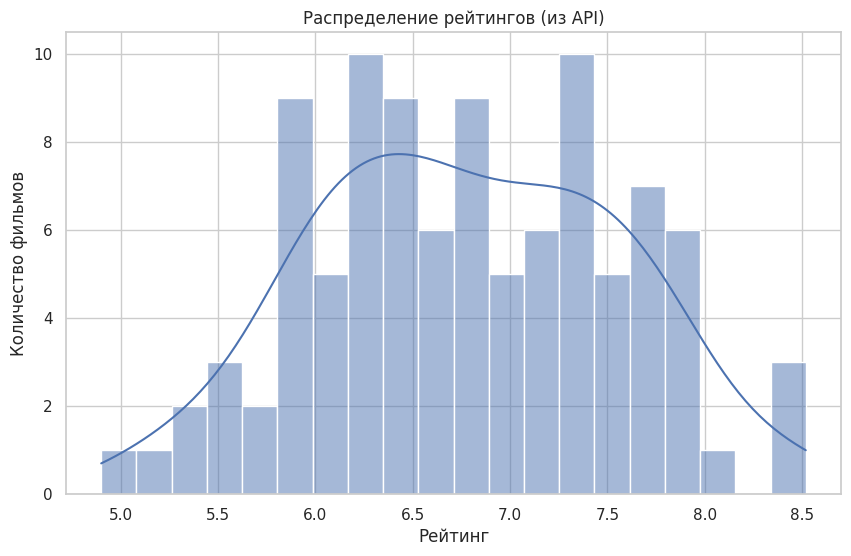

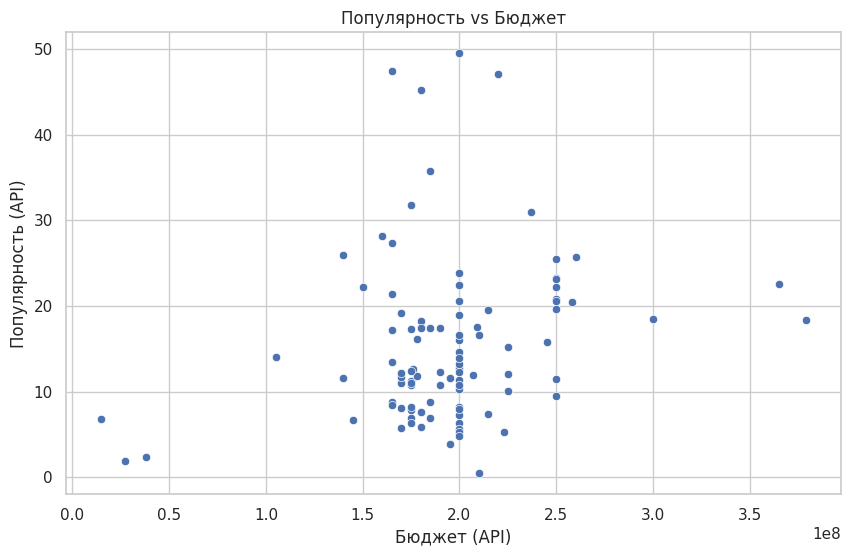

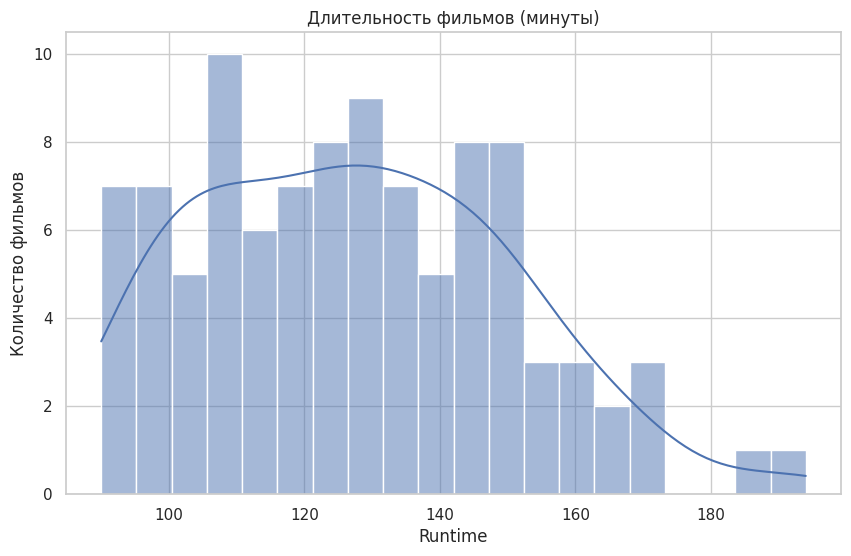

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(merged_df['vote_average_api'].dropna(), bins=20, kde=True)
plt.title("Распределение рейтингов (из API)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="budget_api", y="popularity_api")
plt.title("Популярность vs Бюджет")
plt.xlabel("Бюджет (API)")
plt.ylabel("Популярность (API)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(merged_df['runtime_api'].dropna(), bins=20, kde=True)
plt.title("Длительность фильмов (минуты)")
plt.xlabel("Runtime")
plt.ylabel("Количество фильмов")
plt.show()


Возможные применения в ML

### Возможные применения объединенного датасета в ML:

1. **Регрессия**
   - Предсказание рейтинга (`vote_average_api`) по описанию, бюджету, жанрам, продолжительности и т.д.
   - Оценка будущей прибыли (revenue - budget) до выхода фильма.

2. **Классификация**
   - Классификация по жанру или по типу фильма (боевик, комедия и т.д.).
   - Предсказание успешности (например, доход выше медианы — успешный).

3. **Кластеризация**
   - Сегментация фильмов по жанрам, бюджету, популярности и другим признакам.

4. **Рекомендательные системы**
   - Построение модели рекомендаций на основе похожести фильмов (по ключевым словам, описанию, жанрам).

5. **NLP-задачи**
   - Анализ описания фильмов (overview), создание эмбеддингов, генерация тегов, резюме и т.д.
